# Import Libraries

In [95]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

# Read Data

In [96]:
# model_data = pd.read_excel(os.getcwd()+"/Data/Titanic_model_data.xlsx", index_col=False)\
# model_data

In [97]:
titanic_Data = pd.read_csv(os.getcwd()+'\Data\Titanic Dataset.csv')

In [98]:
model_data = titanic_Data[['pclass', 'sex', 'embarked', 'sibsp', 'parch', 'age', 'fare', 'survived']]
sex_dict = {'female':0, "male":1}
embarked_dict = {'S':1, 'C':2, 'Q':3}
model_data['sex'] = model_data['sex'].map(lambda x: sex_dict[x])
model_data['embarked'] = model_data['embarked'].map(lambda x: embarked_dict[x], na_action='ignore')

C:\Users\ravip\AppData\Local\Temp\ipykernel_20604\1367737143.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['sex'] = model_data['sex'].map(lambda x: sex_dict[x])
C:\Users\ravip\AppData\Local\Temp\ipykernel_20604\1367737143.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['embarked'] = model_data['embarked'].map(lambda x: embarked_dict[x], na_action='ignore')


In [99]:
X = model_data[['pclass', 'sex', 'embarked', 'sibsp', 'parch', 'age',
       'fare']]
y = model_data[['survived']]

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
DT_model = DecisionTreeClassifier(criterion="gini", max_depth=10, min_samples_leaf=5, random_state=100)
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=100)

In [101]:
predictions = DT_model.predict(X_test)
print(accuracy_score(predictions, y_test))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7888040712468194
[[206  30]
 [ 53 104]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       236
           1       0.78      0.66      0.71       157

    accuracy                           0.79       393
   macro avg       0.79      0.77      0.77       393
weighted avg       0.79      0.79      0.79       393



[Text(0.5011160714285714, 0.9545454545454546, 'x[1] <= 0.5\ngini = 0.468\nsamples = 916\nvalue = [573, 343]'),
 Text(0.2767857142857143, 0.8636363636363636, 'x[0] <= 2.5\ngini = 0.407\nsamples = 320\nvalue = [91, 229]'),
 Text(0.11428571428571428, 0.7727272727272727, 'x[6] <= 26.125\ngini = 0.128\nsamples = 172\nvalue = [12, 160]'),
 Text(0.08571428571428572, 0.6818181818181818, 'x[5] <= 43.0\ngini = 0.274\nsamples = 55\nvalue = [9, 46]'),
 Text(0.07142857142857142, 0.5909090909090909, 'x[5] <= 39.0\ngini = 0.227\nsamples = 46\nvalue = [6, 40]'),
 Text(0.05714285714285714, 0.5, 'x[6] <= 13.25\ngini = 0.255\nsamples = 40\nvalue = [6, 34]'),
 Text(0.02857142857142857, 0.4090909090909091, 'x[5] <= 29.0\ngini = 0.375\nsamples = 12\nvalue = [3, 9]'),
 Text(0.014285714285714285, 0.3181818181818182, 'gini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.04285714285714286, 0.3181818181818182, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.08571428571428572, 0.4090909090909091, 'x[5] <= 2

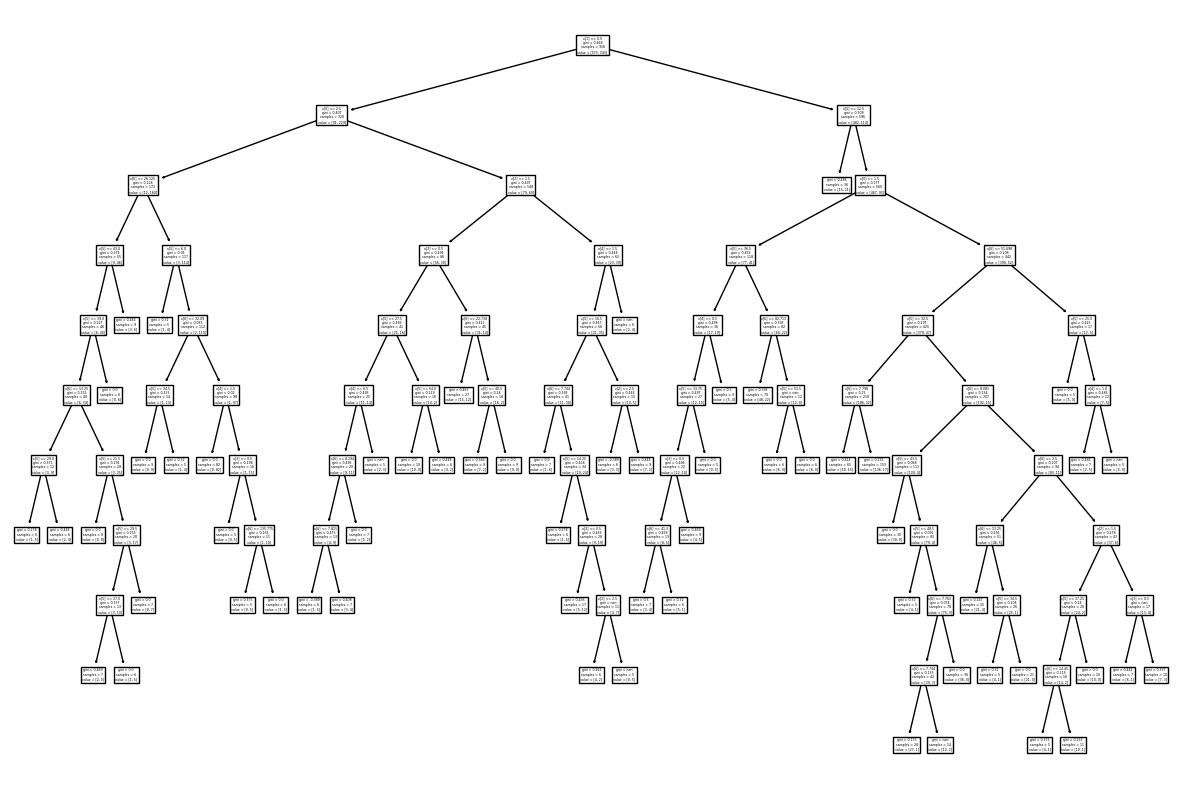

In [102]:
plt.figure(figsize=(15,10))
tree.plot_tree(DT_model)

# pre-prunning

In [103]:
parameter={
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best', 'random'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    'min_samples_leaf':[3,4,5,6,7,8,9,10]
}
tree_model = DecisionTreeClassifier(random_state=100)
cv = GridSearchCV(tree_model, param_grid=parameter, cv=5, scoring='accuracy')

In [104]:
cv.fit(X_train, y_train)

C:\Users\ravip\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1800 fits failed out of a total of 3600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1800 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ravip\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ravip\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ravip\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 959, in fit
    super()._fit(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [105]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 4,
 'splitter': 'best'}

In [110]:
DT_entrophy = DecisionTreeClassifier(criterion="gini", max_depth=8, min_samples_leaf=4, random_state=100)
DT_entrophy.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=4, random_state=100)

In [111]:
predictions = DT_entrophy.predict(X_test)
print(accuracy_score(predictions, y_test))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7811704834605598
[[207  29]
 [ 57 100]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       236
           1       0.78      0.64      0.70       157

    accuracy                           0.78       393
   macro avg       0.78      0.76      0.76       393
weighted avg       0.78      0.78      0.78       393

